In [1]:
import pandas as pd
import re
import nltk
import spacy
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet as wn, stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from collections import defaultdict, Counter
import subprocess
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# =============================
# Load Preprocessed Dataset
# =============================
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/processed_emails_combined.csv")
df.dropna(subset=['cleaned_text'], inplace=True)

# =============================
# TF-IDF Vectorization
# =============================
X = df['cleaned_text']
y = df['label']

vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# =============================
# Train-Test Split
# =============================
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

In [3]:
# =============================
# Train Multinomial Naive Bayes
# =============================
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [4]:

# =============================
# Evaluate Model
# =============================
y_pred = model.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Classification Report:\n")
print(classification_report(y_test, y_pred))
print("\n✅ Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))



✅ Accuracy: 0.9451862262825017

✅ Classification Report:

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      4078
         1.0       0.91      0.96      0.94      3037

    accuracy                           0.95      7115
   macro avg       0.94      0.95      0.94      7115
weighted avg       0.95      0.95      0.95      7115


✅ Confusion Matrix:

[[3800  278]
 [ 112 2925]]


In [5]:
# =============================
# Save Model & Vectorizer
# =============================
import pickle

with open("spam_classifier_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

with open("tfidf_vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)

print("✅ Model and vectorizer saved to disk.")


✅ Model and vectorizer saved to disk.


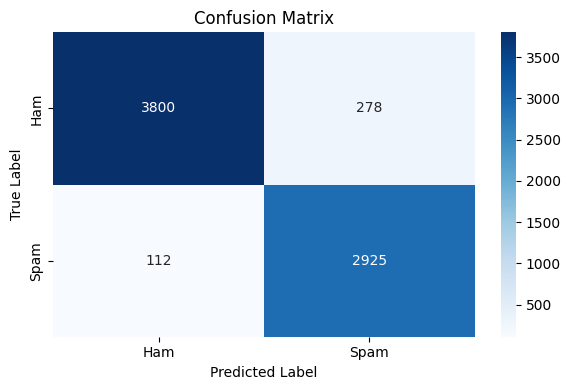

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig("confusion_matrix.png")  # Optional: save as image
plt.show()


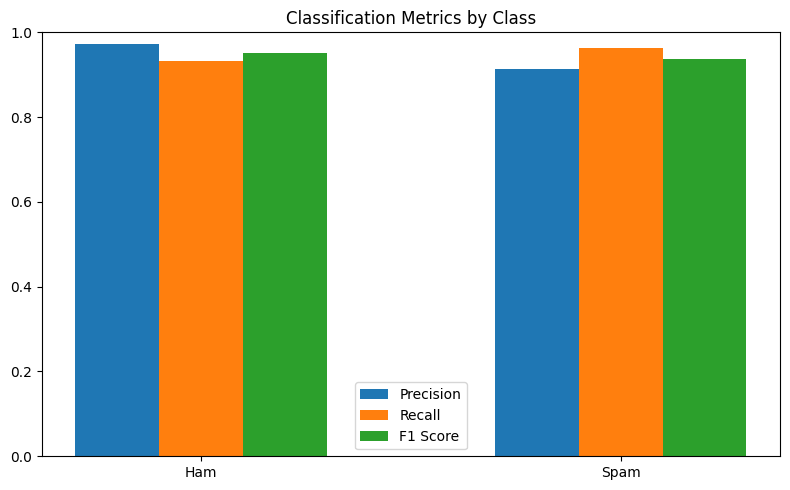

In [7]:
from sklearn.metrics import precision_recall_fscore_support

# Extract precision, recall, f1
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

labels = ['Ham', 'Spam']
x = range(len(labels))

plt.figure(figsize=(8, 5))
plt.bar(x, precision, width=0.2, label='Precision', align='center')
plt.bar([i + 0.2 for i in x], recall, width=0.2, label='Recall', align='center')
plt.bar([i + 0.4 for i in x], f1, width=0.2, label='F1 Score', align='center')
plt.xticks([i + 0.2 for i in x], labels)
plt.ylim(0, 1)
plt.title("Classification Metrics by Class")
plt.legend()
plt.tight_layout()
plt.savefig("classification_metrics.png")  # Optional
plt.show()


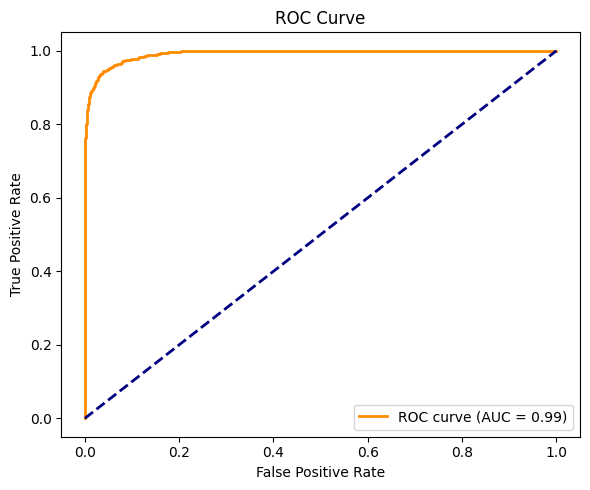

In [8]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for class 1
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("roc_curve.png")
plt.show()
